In [83]:
import numpy as np
import pandas as pd
from datetime import datetime

In [249]:
# CSV 파일 읽기
df = pd.read_csv("./레이블부여된공지사항.csv") 
df.head()

,Cid,title,hits,time,cluster
0,1,(예비군연대) 2023년 6월 각 군 현역병 모집계획 안내,조회 116,2023.05.26.,43
1,1,2023 세계스카우트잼버리 영외과정활동 「사찰문화체험」 통역 자원봉사자 모집,조회 99,2023.05.26.,25
2,1,「대학생 테마별 톡톡 멘토링」 참여 동아리 추가모집,조회 180,2023.05.25.,285
3,1,「2023년 국가간 청소년교류」 및 「글로벌 청소년 서밋」청소년 참가자 모집,조회 174,2023.05.25.,354
4,1,2023-1 실험실습 교과목 만족도 조사 안내 (드림패스 마일리지 지급),조회 125,2023.05.25.,140


In [250]:
#hits: 숫자만 저장
df['hits'] = df['hits'].str.replace(r'[^0-9]', '')

C:\Users\yuty\AppData\Local\Temp/ipykernel_14660/2600687568.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['hits'] = df['hits'].str.replace(r'[^0-9]', '')


In [251]:
#날짜별 데이터양식 동일
pd.DataFrame(data={'time':['20220630','20220505','2022-05-01','04/05/2022','2021.12.31']})
df['time']=pd.to_datetime(df['time']) 
df

,Cid,title,hits,time,cluster
0,1,(예비군연대) 2023년 6월 각 군 현역병 모집계획 안내,116,2023-05-26,43
1,1,2023 세계스카우트잼버리 영외과정활동 「사찰문화체험」 통역 자원봉사자 모집,99,2023-05-26,25
2,1,「대학생 테마별 톡톡 멘토링」 참여 동아리 추가모집,180,2023-05-25,285
3,1,「2023년 국가간 청소년교류」 및 「글로벌 청소년 서밋」청소년 참가자 모집,174,2023-05-25,354
4,1,2023-1 실험실습 교과목 만족도 조사 안내 (드림패스 마일리지 지급),125,2023-05-25,140
...,...,...,...,...,...
9902,10,2019년 1학기 학석 공통 과목 개설목록 안내,675,2019-01-24,25
9903,10,대학원 강좌 수강신청 안내,487,2019-01-23,307
9904,10,2019학년도 봄 학위수여식 일정 공지,421,2019-01-15,214
9905,10,2019학년도 1학기 희망강의 신청 안내,476,2019-01-15,169


In [252]:
df.to_csv(r'.\레이블부여된공지사항(수정본).csv', index = False,encoding='utf-8-sig')

In [253]:
#날짜별 조희수 저장 
#lf = df.reindex(columns=["Cid","time","hits"]) 
lf = df.reindex(columns=["time","hits"]) 

In [254]:
#조희 모듬 데이터
#with pd.option_context('display.max_rows', None,
#                       'display.max_columns', None,
#                       'display.precision', 3,
#                       ):
#    print(lf)
lf

,time,hits
0,2023-05-26,116
1,2023-05-26,99
2,2023-05-25,180
3,2023-05-25,174
4,2023-05-25,125
...,...,...
9902,2019-01-24,675
9903,2019-01-23,487
9904,2019-01-15,421
9905,2019-01-15,476


In [255]:
 #hits열 int type 로 변환
lf[['hits']] = lf[['hits']].astype(int)
print(lf.dtypes)

time    datetime64[ns]
hits             int32
dtype: object


In [256]:
#lf = lf.groupby(['time','Cid']).sum()#동일 날짜의 조희수 더하기
lf = lf.groupby(['time']).sum()
lf
    

,hits
time,
2016-07-06,2554
2017-06-08,123891
2018-01-10,8941
2018-01-23,13598
2018-03-02,27341
...,...
2023-05-22,3571
2023-05-23,2996
2023-05-24,1946


In [257]:
#조희수 정확하게 더하는지 확인 ex)time:2017-06-08  hits: 123891
df.loc[(df["time"]=='2017-06-08') ] 

,Cid,title,hits,time,cluster
5539,2,휴학생 등록제도 변경 안내,82560,2017-06-08,374
7088,3,<필독> 등록금제도 변경에 따른 이월가능장학금 안내,41331,2017-06-08,25


In [258]:
lf = lf.drop(labels=['2016-07-06','2017-06-08'],axis=0)
lf

,hits
time,
2018-01-10,8941
2018-01-23,13598
2018-03-02,27341
2018-03-13,19350
2018-04-08,32597
...,...
2023-05-22,3571
2023-05-23,2996
2023-05-24,1946


In [259]:
#index 추가
lf = lf.reset_index(drop=False) 
lf

,time,hits
0,2018-01-10,8941
1,2018-01-23,13598
2,2018-03-02,27341
3,2018-03-13,19350
4,2018-04-08,32597
...,...,...
1161,2023-05-22,3571
1162,2023-05-23,2996
1163,2023-05-24,1946
1164,2023-05-25,1930


In [260]:
#날짜별 각 게시판의 공지조희수 정확하게 더하는지 확인 ex)time:2017-06-08  
lf.loc[(lf['time']=='2018-01-10') ] 

,time,hits
0,2018-01-10,8941


In [261]:
#CSV파일 저장
#lf.to_csv(r'.\날짜별 각 게시판의 공지조희수.csv', index = False)

In [262]:
lf['time']=pd.to_datetime(lf['time'])
lf=lf.set_index('time')
#print(lf.resample('w').sum().to_period('w'))
pf = lf.resample('m').sum().to_period('m')
#print(lf.resample('q').sum().to_period('q'))
#print(lf.resample('as').sum().to_period('a'))
pf

,hits
time,
2018-01,22539
2018-02,0
2018-03,46691
2018-04,32597
2018-05,17543
...,...
2023-01,207783
2023-02,186246
2023-03,148018


In [263]:
#index 추가
lf_month = pf.reset_index(drop=False) 
lf_month

,time,hits
0,2018-01,22539
1,2018-02,0
2,2018-03,46691
3,2018-04,32597
4,2018-05,17543
...,...,...
60,2023-01,207783
61,2023-02,186246
62,2023-03,148018
63,2023-04,95550


In [266]:
#CSV파일 저장
#lf_month.to_csv(r'.\월별 각 게시판의 공지조희수.csv', index = False)

In [267]:
pf

,hits
time,
2018-01,22539
2018-02,0
2018-03,46691
2018-04,32597
2018-05,17543
...,...
2023-01,207783
2023-02,186246
2023-03,148018


In [268]:
print(pf['2018']) #2018년 데이터 저장
pf_2018 = pf['2018']

           hits
time           
2018-01   22539
2018-02       0
2018-03   46691
2018-04   32597
2018-05   17543
2018-06       0
2018-07   23556
2018-08   74886
2018-09       0
2018-10   18142
2018-11   35816
2018-12  171655


C:\Users\yuty\AppData\Local\Temp/ipykernel_14660/1953958090.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  print(pf['2018'])
C:\Users\yuty\AppData\Local\Temp/ipykernel_14660/1953958090.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  pf_2018 = pf['2018']


In [269]:
#index 추가
pf_2018 = pf_2018.reset_index(drop=False) 
pf_2018

,time,hits
0,2018-01,22539
1,2018-02,0
2,2018-03,46691
3,2018-04,32597
4,2018-05,17543
5,2018-06,0
6,2018-07,23556
7,2018-08,74886
8,2018-09,0
9,2018-10,18142


In [270]:
import matplotlib.pyplot as plt
import seaborn as sns

In [275]:
pf_2019 = pf['2019'] #2019년 데이터 저장
pf_2019 = pf_2019.reset_index(drop=False) #index 추가

pf_2020 = pf['2020']#2020년 데이터 저장
pf_2020 = pf_2020.reset_index(drop=False) #index 추가

pf_2021 = pf['2021']#2021년 데이터 저장
pf_2021 = pf_2021.reset_index(drop=False)#index 추가 

pf_2022 = pf['2022']#2022년 데이터 저장
pf_2022 = pf_2022.reset_index(drop=False) #index 추가

pf_2023 = pf['2023']#2023년 데이터 저장
pf_2023 = pf_2023.reset_index(drop=False) #index 추가

C:\Users\yuty\AppData\Local\Temp/ipykernel_14660/1500362309.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  pf_2019 = pf['2019'] #2019년 데이터 저장
C:\Users\yuty\AppData\Local\Temp/ipykernel_14660/1500362309.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  pf_2020 = pf['2020']#2020년 데이터 저장
C:\Users\yuty\AppData\Local\Temp/ipykernel_14660/1500362309.py:7: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  pf_2021 = pf['2021']#2021년 데이터 저장
C:\Users\yuty\AppData\Local\Temp/ipykernel_14660/15003

<AxesSubplot:xlabel='time'>

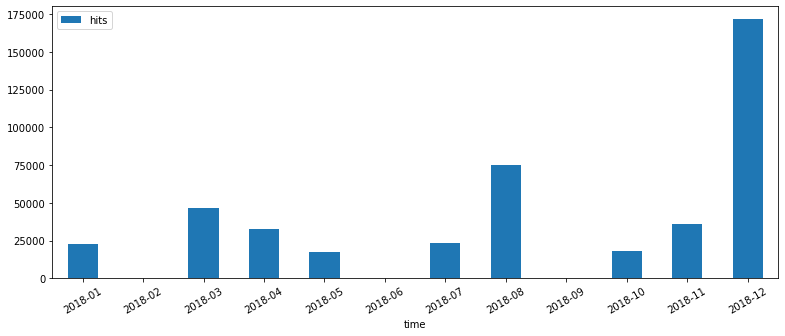

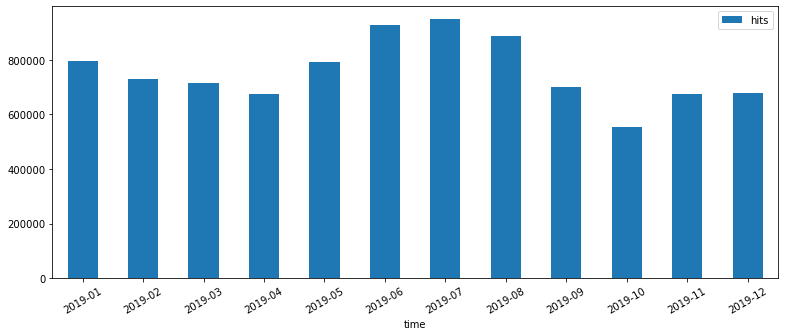

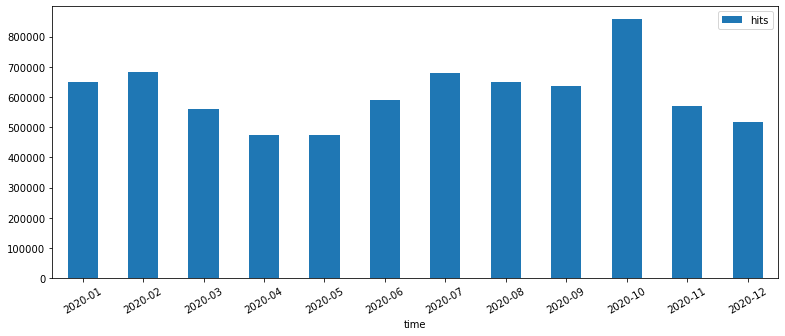

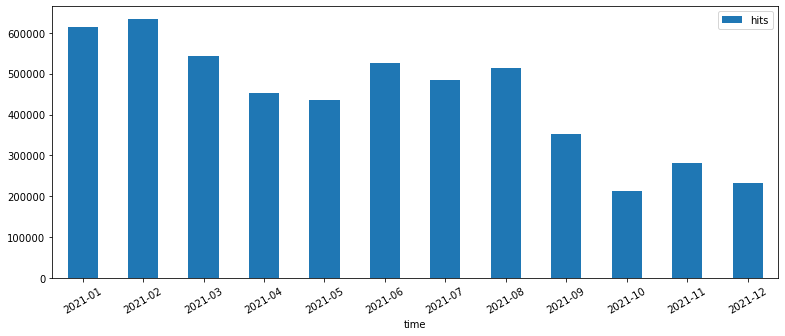

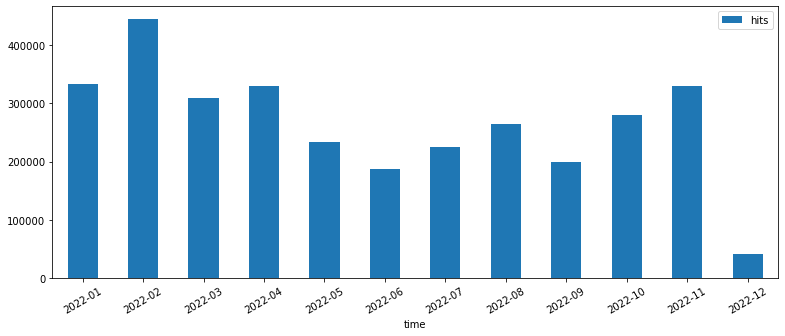

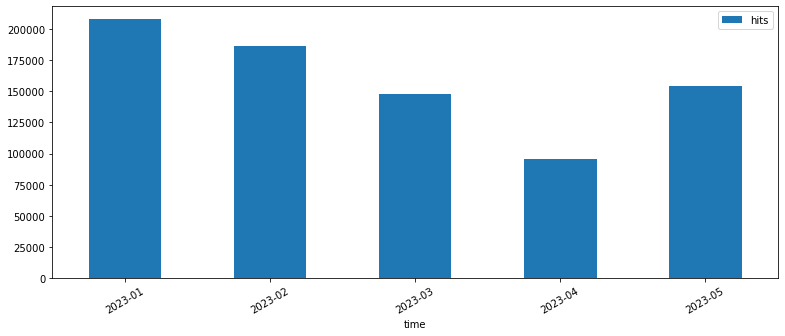

In [276]:
pf_2018.plot.bar(x='time',y='hits', rot=30) #그래프 그리기
pf_2019.plot.bar(x='time',y='hits', rot=30)
pf_2020.plot.bar(x='time',y='hits', rot=30)
pf_2021.plot.bar(x='time',y='hits', rot=30)
pf_2022.plot.bar(x='time',y='hits', rot=30)
pf_2023.plot.bar(x='time',y='hits', rot=30)